## 3.1 导入图片数据集

### 3.1.1 下载并安装MNIST数据集

In [1]:
%matplotlib inline
# 下载数据集并将文件解压到当前代码所在同级目录的MNIST_data文件夹下

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True) # one_hot = True表示对标签进行独热编码

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


输入数据: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
输入数据的形状: (55000, 784)


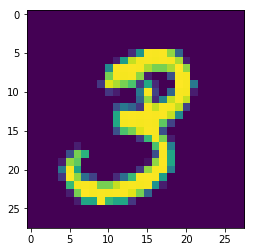

In [2]:
print('输入数据:', mnist.train.images)
print('输入数据的形状:', mnist.train.images.shape)
import pylab
im = mnist.train.images[1]
im = im.reshape(-1, 28)
pylab.imshow(im)
pylab.show()

In [3]:
# MNIST包含3个数据集: 第一个是训练数据集，另外两个分别是测试数据集(mnist.test)和验证数据集(minst.validation)
print('测试数据的形状:', mnist.test.images.shape)
print('输入数据的形状:', mnist.validation.images.shape)

测试数据的形状: (10000, 784)
输入数据的形状: (5000, 784)


## 3.2 分析图片的特点，定义变量

In [4]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import pylab

mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

# 创建saver对象
saver = tf.train.Saver()
# 设置存储路径
model_path = 'log/MNIST_recognition'

tf.reset_default_graph()
# 定义占位符
x = tf.placeholder(tf.float32, shape=[None, 28*28]) # 输入图片的维度为28 * 28 =784
                                                    # shape参数中的None代表张量的第一个维度可以是任意长度的
y = tf.placeholder(tf.float32, shape=[None, 10]) # 数字0-9，共10个类别

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## 3.3 构建模型

In [5]:
# 定义学习参数
w = tf.Variable(tf.random_normal(([784, 10])), name='weight')
b = tf.Variable(tf.zeros(([10])), name='bias')

# 搭建正向模型—定义输出节点
pred = tf.nn.softmax(tf.matmul(x, w) + b) # softmax分类

# 搭建反向模型—定义反向传播的结构
# 定义损失函数
cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(pred), reduction_indices=1))

# 使用梯度下降优化器
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


## 训练模型并输出中间状态参数

Epoch: 0001 cost= 7.800092667
Epoch: 0002 cost= 4.189810447
Epoch: 0003 cost= 2.920625732
Epoch: 0004 cost= 2.300770526
Epoch: 0005 cost= 1.948435313
Epoch: 0006 cost= 1.720895854
Epoch: 0007 cost= 1.565009457
Epoch: 0008 cost= 1.445398739
Epoch: 0009 cost= 1.356658870
Epoch: 0010 cost= 1.282713319
Epoch: 0011 cost= 1.223460970
Epoch: 0012 cost= 1.173050876
Epoch: 0013 cost= 1.129134410
Epoch: 0014 cost= 1.091905132
Epoch: 0015 cost= 1.058097314
Epoch: 0016 cost= 1.028927710
Epoch: 0017 cost= 1.002162912
Epoch: 0018 cost= 0.977614583
Epoch: 0019 cost= 0.957855033
Epoch: 0020 cost= 0.936050969
Epoch: 0021 cost= 0.917982248
Epoch: 0022 cost= 0.900905509
Epoch: 0023 cost= 0.884052798
Epoch: 0024 cost= 0.870114659
Epoch: 0025 cost= 0.858718369
Finished! 
Accuracy: 0.8294
Model saved in file:log/MNIST_recognition
Starting 2nd session...
INFO:tensorflow:Restoring parameters from log/MNIST_recognition
Accuracy: 0.8294
[1 1] [[3.7840211e-06 5.4532045e-01 7.0479442e-03 2.0551835e-03 1.3936495e-

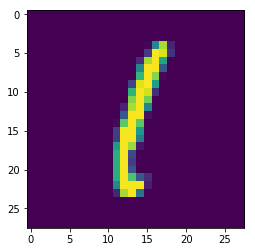

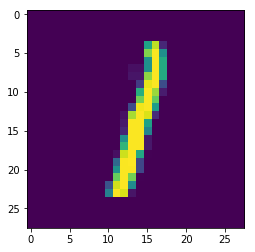

In [25]:
# 定义训练相关参数
training_epochs = 25
batch_size = 100
display_step = 1

# 启动session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # Initializing 
    
    # 启动循环，开始训练
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples/batch_size)
        # 循环所有数据集
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, c = sess.run([optimizer, cost], feed_dict={x:batch_xs, y:batch_ys})
        # 计算平均loss值
            avg_cost += c / total_batch
    # 显示训练中的详细信息
        if (epoch+1) % display_step == 0:
            print('Epoch:', '%04d' % (epoch+1), 'cost=', '{:.9f}'.format(avg_cost))
        
    print('Finished! ')
    
    
# 3.5 测试模型
# 测试model
    correct_prediction = tf.equal(tf.argmax(pred,1), tf.argmax(y, 1))
# 计算准确率
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print('Accuracy:', accuracy.eval(feed_dict={x:mnist.test.images, y:mnist.test.labels}))
    
# 3.6 保存模型    
    save_path=saver.save(sess, model_path)
    print('Model saved in file:{}'.format(save_path))

# 3.7 读取模型

print('Starting 2nd session...') 
with tf.Session() as sess:
    # 初始化变量
    sess.run(tf.global_variables_initializer())
    # 载入模型
    saver.restore(sess, model_path)
    
    # 测试模型
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # 计算准确率
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print('Accuracy:', accuracy.eval(feed_dict={x:mnist.test.images, y:mnist.test.labels}))
    
    output = tf.argmax(pred, 1)
    batch_xs, batch_ys = mnist.train.next_batch(2)
    outputval, predv = sess.run([output, pred], feed_dict={x:batch_xs})
    print(outputval, predv, batch_ys)
    
    im = batch_xs[0]
    im = im.reshape(-1, 28)
    pylab.imshow(im)
    pylab.show()
    
    im = batch_xs[1]
    im = im.reshape(-1, 28)
    pylab.imshow(im)
    pylab.show()